# Analyze distribution of answers


* we expect a single catgory to have most 'true' labels
* categorical values and normal distribution - not entirely sure this works
* idea: sort labels according to answers

In [19]:
from load_data import load_experiment_data
from utils_analysis import sort_by_key
from collections import Counter



def get_pair_rel_cnts(data_dict_list):
    pair_dicts = sort_by_key(data_dict_list, ['property', 'concept'])
    pair_relation_cnts = dict()
    for pair, dicts in pair_dicts.items():
        if not pair[0].startswith('_'):
            relation_dicts = sort_by_key(dicts, ['relation'])
            rel_cnt = Counter()
            for rel, rel_dicts in relation_dicts.items():
                n_true = len([d['answer'] for d in rel_dicts if d['answer'] == 'true'])
                rel_cnt[rel] = n_true/len(rel_dicts)
            pair_relation_cnts[pair] = rel_cnt
    return pair_relation_cnts
        
        
        
run = '4'
batch = '*'
n_q = '*'
group = 'experiment2'
data_dict_list = load_experiment_data(run, group, n_q, batch, remove_not_val = True)
pair_relation_cnts =  get_pair_rel_cnts(data_dict_list)

Discarded 0.0 annotations.


In [63]:
n = 0
for pair, rel_dict in pair_relation_cnts.items():
    print(pair)
    for rel, cnt in rel_dict.most_common():
        print(rel, cnt)
    print()
    n += 1
    if n == 10:
        break

black-pea
variability_limited 0.7
rare 0.7
variability_open 0.6
unusual 0.5
typical_of_concept 0.2
creative 0.2
affording_activity 0.2
implied_category 0.1
impossible 0.1
typical_of_property 0.1

hot-fireplace
typical_of_concept 1.0
typical_of_property 0.9
affording_activity 0.9
implied_category 0.8
variability_open 0.6
variability_limited 0.4
rare 0.3
unusual 0.2
impossible 0.2
creative 0.0

made_of_wood-strake
variability_open 0.9
affording_activity 0.6
variability_limited 0.5
rare 0.5
creative 0.5
typical_of_concept 0.5
implied_category 0.5
typical_of_property 0.4
unusual 0.3
impossible 0.2

fly-babbler
afforded_usual 0.6
typical_of_concept 0.6
variability_limited 0.5
impossible 0.5
typical_of_property 0.5
implied_category 0.5
rare 0.3
creative 0.3
unusual 0.1
afforded_unusual 0.0

sweet-tater
variability_limited 0.8
variability_open 0.7
creative 0.6
affording_activity 0.5
typical_of_concept 0.5
implied_category 0.5
typical_of_property 0.4
unusual 0.4
rare 0.3
impossible 0.2

danger

<BarContainer object of 10 artists>

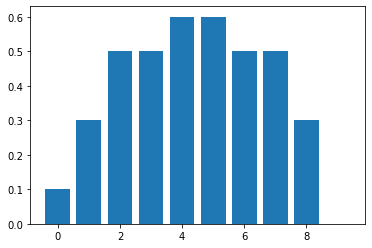

In [84]:
import matplotlib.pyplot as plt

def get_vec(rel_cnts):
    test_keys = []
    rank = 0
    position = 'left'
    for rel, cnt in rel_cnts.most_common():
        if position == 'left':
            new_rank = 0 - rank
            position = 'right'
        elif position == 'right':
            new_rank = 0 + rank
            position = 'left'
        test_keys.insert(new_rank, rel)
        rank += 1
    test_vec = [rel_cnts[k] for k in test_keys]
    return test_vec, test_keys
    

test_pair = 'fly-babbler'
rel_cnts = pair_relation_cnts[test_pair]
test_vec, test_keys = get_vec(rel_cnts)
plt.bar(range(10), test_vec)



<BarContainer object of 10 artists>

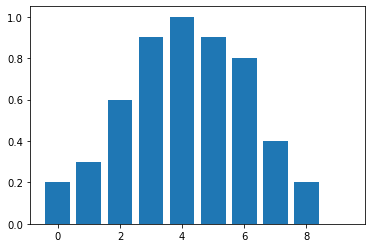

In [81]:
test_pair = 'hot-fireplace'
rel_cnts = pair_relation_cnts[test_pair]
test_vec, test_keys = get_vec(rel_cnts)
plt.bar(range(10), test_vec)

Normal distribution not expected:


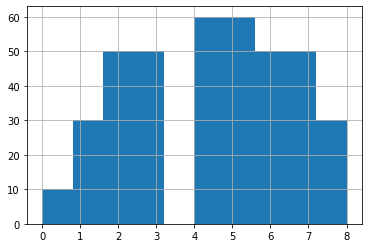

In [78]:
print('Normal distribution not expected:')
test_pair = 'fly-babbler'
rel_cnts = pair_relation_cnts[test_pair]
plt_distribution(rel_cnts)